In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [16]:
ABM_data = pd.read_csv('ABM_data.csv', index_col=[0], delimiter=";", parse_dates= [0])


In [17]:
ABM_data.head()

,confirmed_cases
day,
1,2
2,2
3,2
4,3
5,3


In [18]:
type(ABM_data)

pandas.core.frame.DataFrame

In [19]:
series_value = ABM_data.values

In [20]:
type(series_value)

numpy.ndarray

In [21]:
ABM_data.describe()

,confirmed_cases
count,80.000000
mean,35.487500
std,24.983536
min,2.000000
25%,10.750000
50%,34.000000
75%,59.500000
max,74.000000


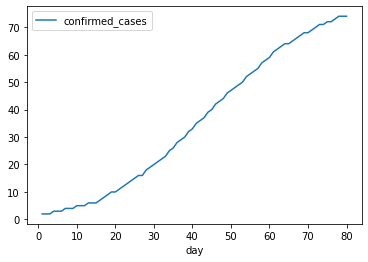

In [22]:
ABM_data.plot()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

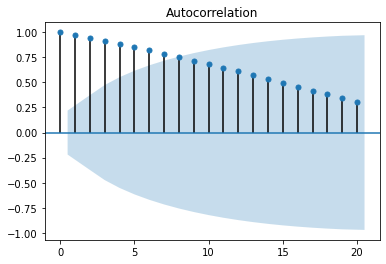

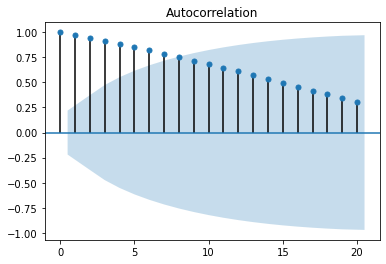

In [24]:
plot_acf(ABM_data)

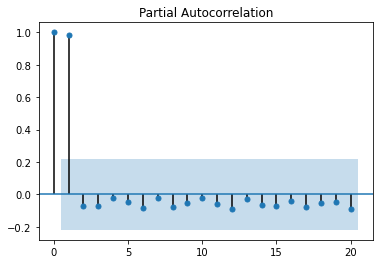

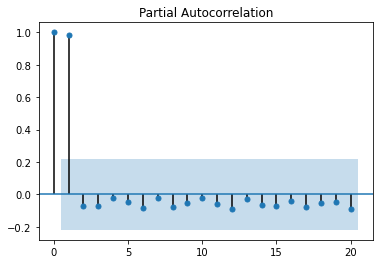

In [25]:
plot_pacf(ABM_data)

In [26]:
ABM_data.size

80

In [27]:
ABM_data_train = ABM_data[0:70]
ABM_data_test = ABM_data[70:80]

In [28]:
ABM_data_train.size

70

In [29]:
ABM_data_test.size

10

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
ABM_data_model = ARIMA(ABM_data_train, order=(2,1,3))

C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [32]:
ABM_data_model_fit = ABM_data_model.fit()

In [33]:
ABM_data_model_fit.aic

105.70604610535979

In [34]:
ABM_data_forecast = ABM_data_model_fit.forecast(steps = 10)[0]

In [35]:
ABM_data_forecast

array([68.90111343, 69.73802515, 70.34789109, 71.09499822, 71.76862138,
       72.49024447, 73.18943824, 73.90665673, 74.61830467, 75.33779937])

In [36]:
ABM_data_test

,confirmed_cases
day,
71,69
72,70
73,71
74,71
75,72
76,72
77,73
78,74
79,74


In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
np.sqrt(mean_squared_error(ABM_data_test, ABM_data_forecast))

0.5498330100052059

C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


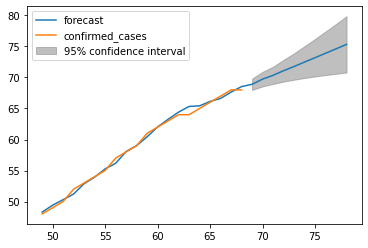

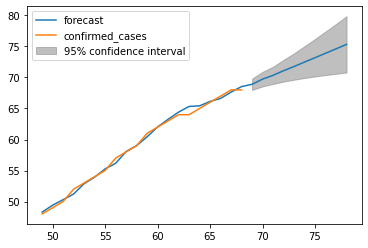

In [39]:
ABM_data_model_fit.plot_predict(50,79)

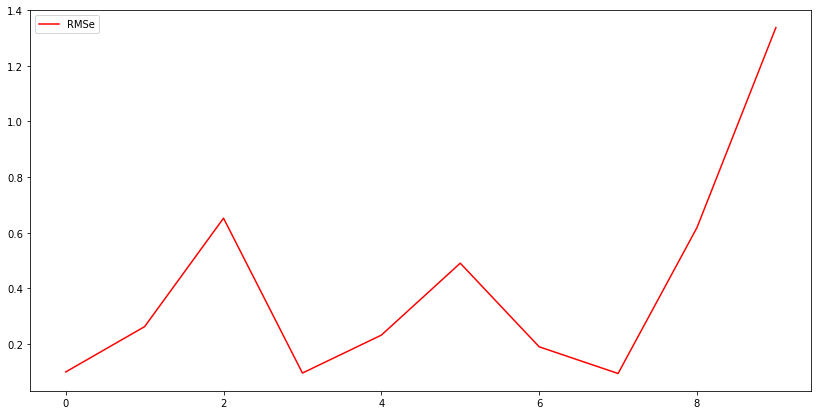

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=[]
for i in range(len(ABM_data_test)):
   #print(sqrt(((ABM_data_test.values[i][0] - ABM_data_forecast[i]) ** 2).mean()))
   rmse.append(sqrt(((ABM_data_test.values[i][0] - ABM_data_forecast[i]) ** 2).mean()))


plt.figure(figsize=(14, 7))
plt.plot(range(len(ABM_data_test)), rmse, color="red", label="RMSe")
plt.legend()

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_value = sqrt(((ABM_data_test.values[i][0] - ABM_data_forecast[i]) ** 2).mean())

print(rmse_value)

1.3377993670544868
